In [307]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
import keras
from scipy.ndimage import shift

In [308]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data("mnist.npz")

In [309]:
x_train.shape

(60000, 28, 28)

In [310]:
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

In [311]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap="binary")
    plt.axis("off")

In [312]:
y_train.shape

(60000, 1)

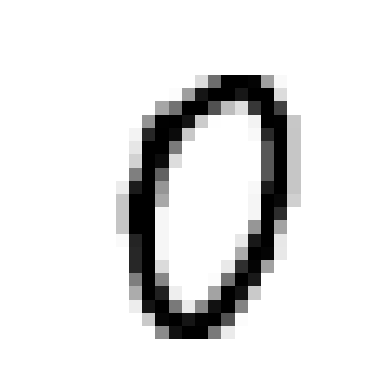

In [313]:
plot_digit(x_train[1000])

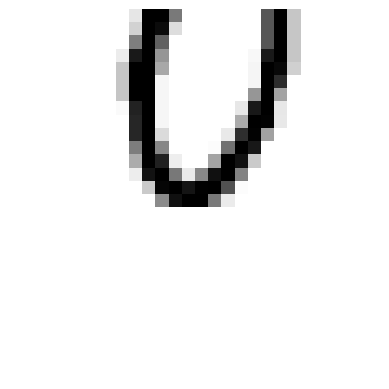

In [314]:
plot_digit(x_train[1000])
x_shift=shift(x_train[1000].reshape(28,28),[-10,0])
plot_digit(x_shift)

In [315]:
def shift_image(image,direction):
    if direction=='left':
        return shift(image.reshape(28,28),[0,-1]).reshape(784)
    elif direction=='right':
        return shift(image.reshape(28,28),[0,1]).reshape(784)
    elif direction=='up':
        return shift(image.reshape(28,28),[-1,0]).reshape(784)
    elif direction=='down':
        return shift(image.reshape(28,28),[1,0]).reshape(784)
 
   

In [316]:
x_aug=[x_train]
y_aug=[y_train]
directions=['left','right','up','down']

In [317]:
for direction in directions:
    X_shifted = np.apply_along_axis(shift_image, 1, x_train, direction)
    x_aug.append(X_shifted)
    y_aug.append(y_train)

    

In [318]:
x_aug = np.concatenate(x_aug)
y_aug = np.concatenate(y_aug)

In [319]:
x_aug=np.array(x_aug)
y_aug=np.array(y_aug)

In [320]:
x_aug.shape

(300000, 784)

In [321]:
x_test.shape

(10000, 784)

In [322]:


parameter={'n_neighbors': np.arange(2, 30, 1)}

In [323]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#knn_cv=GridSearchCV(knn, param_grid=parameter, cv=3, verbose=1,n_jobs=-1)
knn.fit(x_aug,y_aug.ravel())

KNeighborsClassifier()

In [324]:
y_pred=knn.predict(x_test)

In [325]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay,f1_score

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average="weighted")
recall=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")
print(accuracy,precision,recall,f1)

0.9754 0.9755729985297523 0.9754 0.9753742696850474


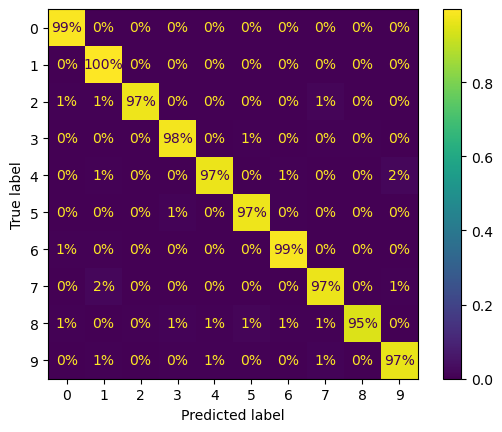

In [326]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize="true",values_format=".0%")